# Deep Learning with Python

## 2.2 Data representations for neural networks

> 神经网络的数据表示

Tensor，张量，任意维的数组（我的意思是编程的那种数组）。矩阵是二维的张量。

我们常把「张量的维度」说成「轴」。

### 认识张量

#### 标量（0D Tensor）

Scalars，标量是 0 维的张量（0个轴），包含一个数。

标量在 numpy 中可以用 float32 或 float64 表示。

In [13]:
import numpy as np

x = np.array(12)
x

array(12)

In [8]:
x.ndim    # 轴数（维数）

1

#### 向量 (1D Tensors)

Vectors，向量是 1 维张量（有1个轴），包含一列标量（就是搞个array装标量）。

In [7]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [6]:
x.ndim

1

我们把这样有5个元素的向量叫做“5维向量”。
但注意**5D向量**可不是**5D张量**！

- 5D向量：只有1个轴，在这个轴上有5个维度。
- 5D张量：有5个轴，在每个轴上可以有任意维度。

这个就很迷，这“维度”有的时候是指轴数，有的时候是指轴上的元素个数。

所以，我们最好换种说法，用「阶」来表示轴数，说 **5阶张量**。

#### 矩阵（2D Tensors）

Matrices，矩阵是 2 阶张量（2个轴，就是我们说的「行」和「列」），包含一列向量（就是搞个array装向量）。

In [10]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [11]:
x.ndim

2

#### 高阶张量

你搞个装矩阵的 array 就得到了3阶张量。

再搞个装3阶张量的 array 就得到了4阶张量，依次类推，就有高阶张量了。

In [13]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

深度学习里，我们一般就用0～4阶的张量。

### 张量的三要素

- 阶数（轴的个数）：3，5，...
- 形状（各轴维数）：(2, 1, 3)，(6, 5, 5, 3, 6)，...
- 数据类型：float32，uint8，...

我们来看看 MNIST 里的张量数据：

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


所以 train_images 是个8位无符号整数的3阶张量。

打印个里面的图片看看：

image:


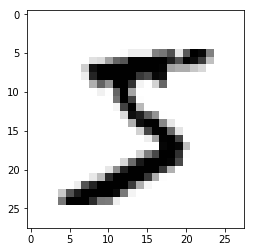

label:  5


In [3]:
digit = train_images[0]

import matplotlib.pyplot as plt

print("image:")
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print("label: ", train_labels[0])

### Numpy张量操作

#### 张量切片：

In [4]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


等价于：

In [5]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


也等价于

In [6]:

my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)


选出 **右下角** 14x14 的：

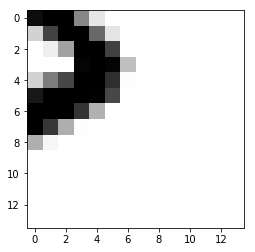

In [7]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

选出 中心处 14x14 的：

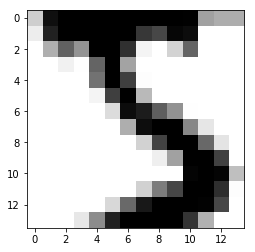

In [8]:
my_slice = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

#### 数据批量

深度学习的数据里，一般第一个轴（index=0）叫做「样本轴」（或者说「样本维度」）。

深度学习里，我们一般不会一次性处理整个数据集，我们一批一批地处理。

在 MNIST 中，我们的一个批量是 128 个数据：

In [10]:
# 第一批
batch = train_images[:128]
# 第二批
batch = train_images[128:256]
# 第n批
n = 12
batch = train_images[128 * n : 128 * (n+1)]

所以，在使用 batch 的时候，我们也把第一个轴叫做「批量轴」。

### 常见数据张量表示

| 数据 | 张量维数 | 形状 |
| :--: | :--: | :-- |
| 向量数据 | 2D | (samples,features) |
| 时间序列 | 3D | (samples, timesteps, features) |
| 图像 | 4D | (samples, height, width, channels) 或 (samples, channels, height, width) |
| 视频 | 5D | (samples, frames, height, width, channels) 或 (samples, frames, channels, height, width) |
